<a href="https://colab.research.google.com/github/dakshverma-dev/Heart-Disease-predictor/blob/main/Heart_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 0: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
from sklearn import tree
import graphviz

sns.set(style="whitegrid")

In [ ]:
# @title Step-1: Data Analysis


In [ ]:
# Upload the CSV file
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving Heart Disease.csv to Heart Disease.csv
{'Heart Disease.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n4

In [ ]:
# Load the dataset
df = pd.read_csv("Heart Disease.csv")

In [ ]:
# Preview data
print("First 5 records:")
print(df.head())

First 5 records:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Dataset info
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
# Descriptive statistics
print("\nStatistics:")
print(df.describe())


Statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

In [ ]:
# @title # Step 2: Data Visualization:-


/tmp/ipython-input-14-1733512060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


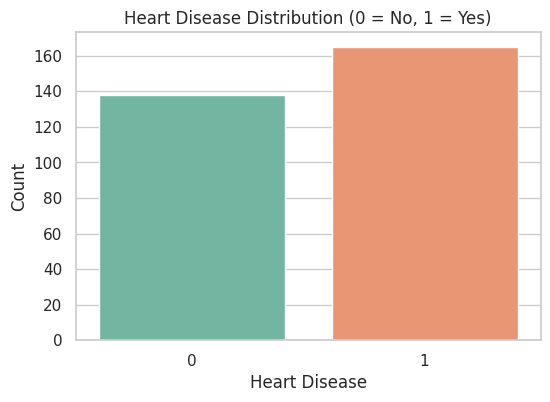

In [ ]:
# a. Heart disease distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Heart Disease Distribution (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

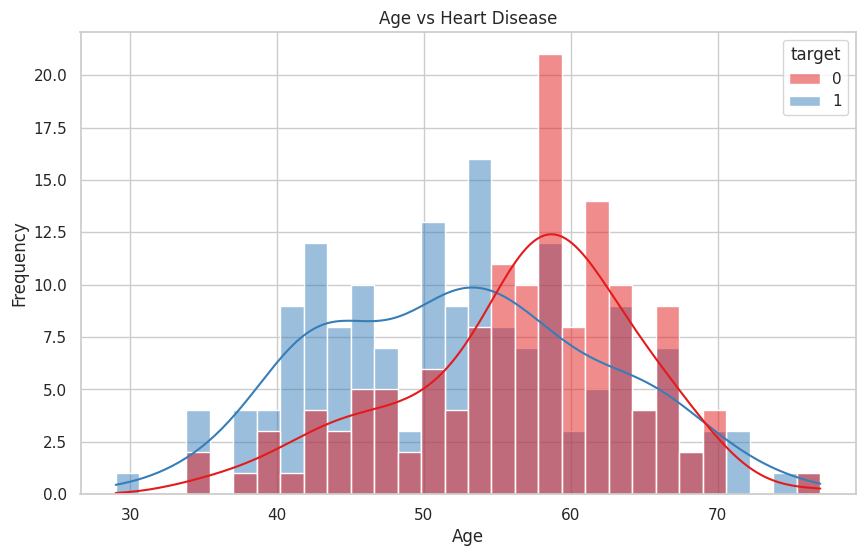

In [ ]:
# b. Age vs Heart Disease
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=30, palette='Set1')
plt.title('Age vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

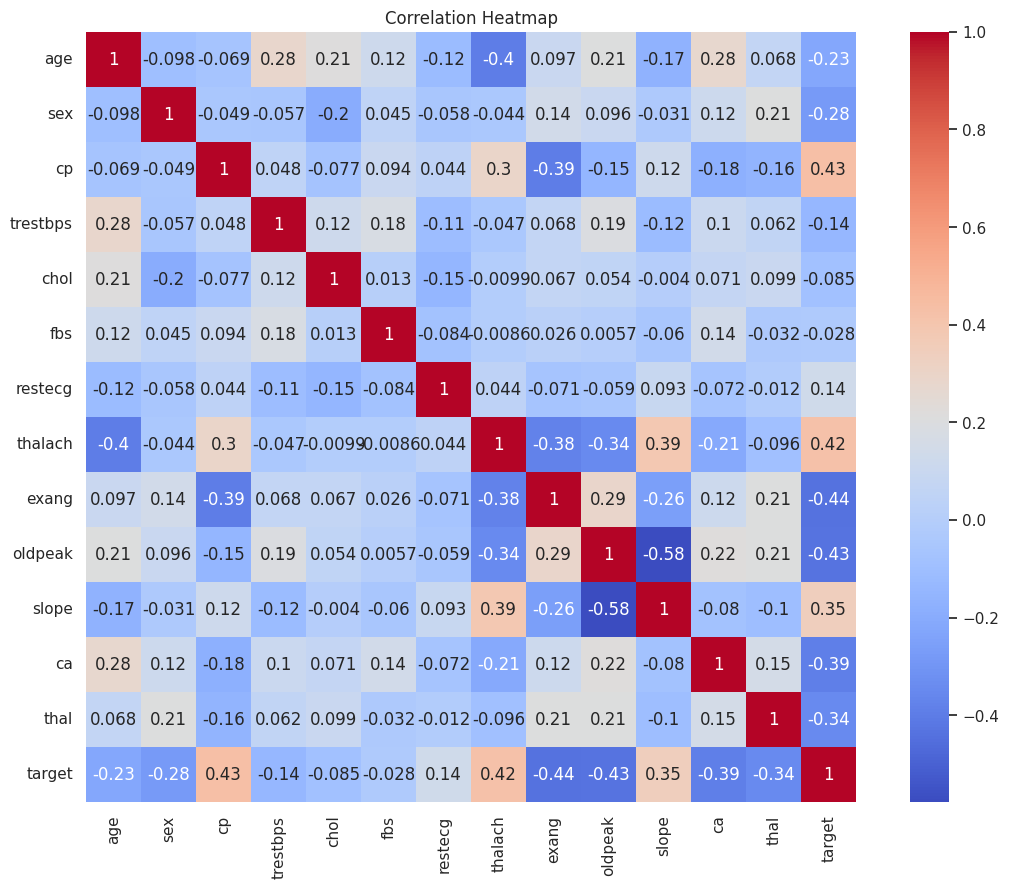

In [ ]:
# c. Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# @title # Step 3: Logistic Regression:-


In [ ]:
X = df.drop("target", axis=1)
y = df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_log)
print("\nAccuracy: {:.2f}%".format(accuracy_log * 100))

Confusion Matrix (Logistic Regression):
[[32  9]
 [ 8 42]]

Accuracy: 81.32%


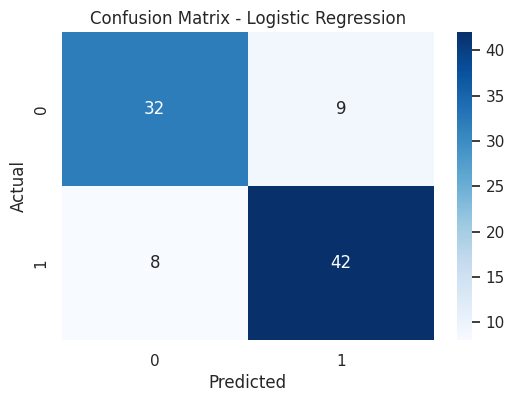

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# @title Step 4: Decision Tree:-


In [ ]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_dt, y_train_dt)
y_pred_dt = dt_model.predict(X_test_dt)

conf_matrix_dt = confusion_matrix(y_test_dt, y_pred_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)

print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)
print("\nAccuracy: {:.2f}%".format(accuracy_dt * 100))

Confusion Matrix (Decision Tree):
[[32  9]
 [15 35]]

Accuracy: 73.63%


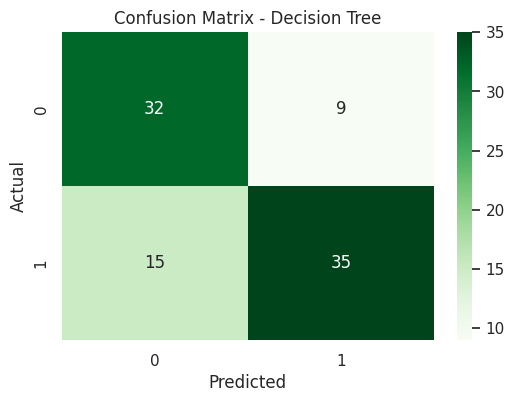

In [ ]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Graphviz Tree Visualization
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=X.columns,
                           class_names=["No Disease", "Disease"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_heart", format="png", cleanup=True)

'decision_tree_heart.png'

In [ ]:
# @title Step 5: Random Forest:-


In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = rf_model.predict(X_test_rf)

conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)
print("\nAccuracy: {:.2f}%".format(accuracy_rf * 100))

Confusion Matrix (Random Forest):
[[33  8]
 [ 8 42]]

Accuracy: 82.42%


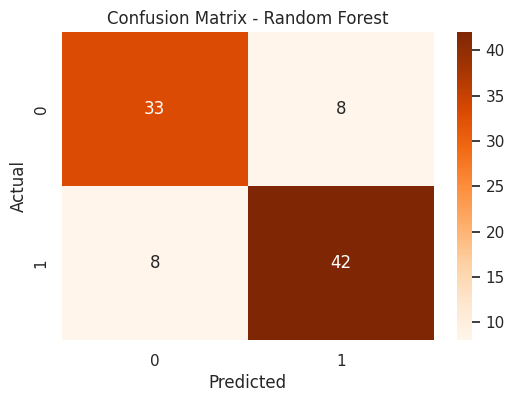

In [ ]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipython-input-27-2918295475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette="viridis")


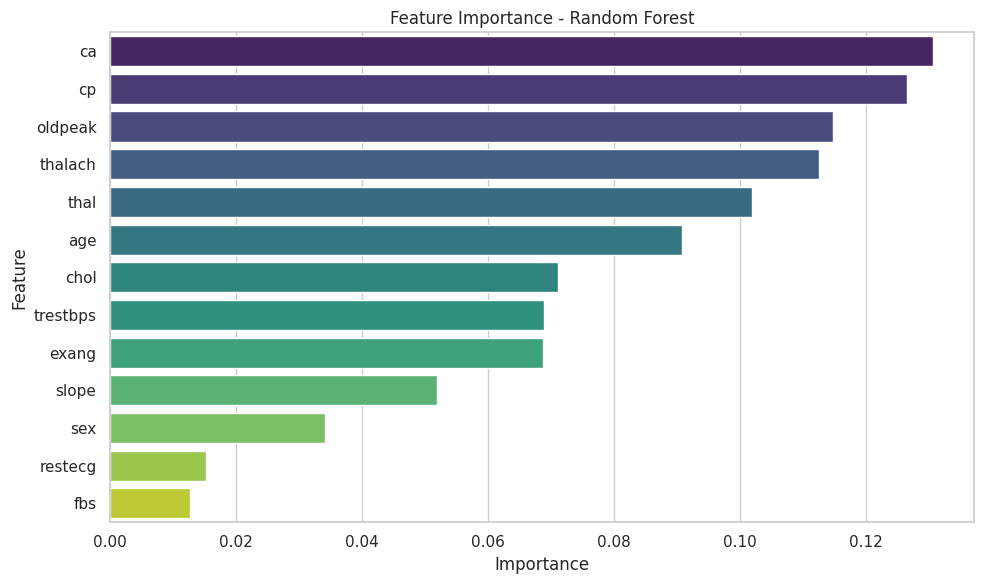

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
# @title Step 6: Model Comparison:-


In [ ]:
print("\n--- Classification Reports ---")
print("\nLogistic Regression:\n", classification_report(y_test, y_pred_log))
print("Decision Tree:\n", classification_report(y_test_dt, y_pred_dt))
print("Random Forest:\n", classification_report(y_test_rf, y_pred_rf))


--- Classification Reports ---

Logistic Regression:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.

In [ ]:
# Accuracy, Precision, Recall, F1
models = ["Logistic Regression", "Decision Tree", "Random Forest"]
accuracies = [accuracy_log, accuracy_dt, accuracy_rf]
precisions = [precision_score(y_test, y_pred_log),
              precision_score(y_test_dt, y_pred_dt),
              precision_score(y_test_rf, y_pred_rf)]
recalls = [recall_score(y_test, y_pred_log),
           recall_score(y_test_dt, y_pred_dt),
           recall_score(y_test_rf, y_pred_rf)]
f1s = [f1_score(y_test, y_pred_log),
       f1_score(y_test_dt, y_pred_dt),
       f1_score(y_test_rf, y_pred_rf)]

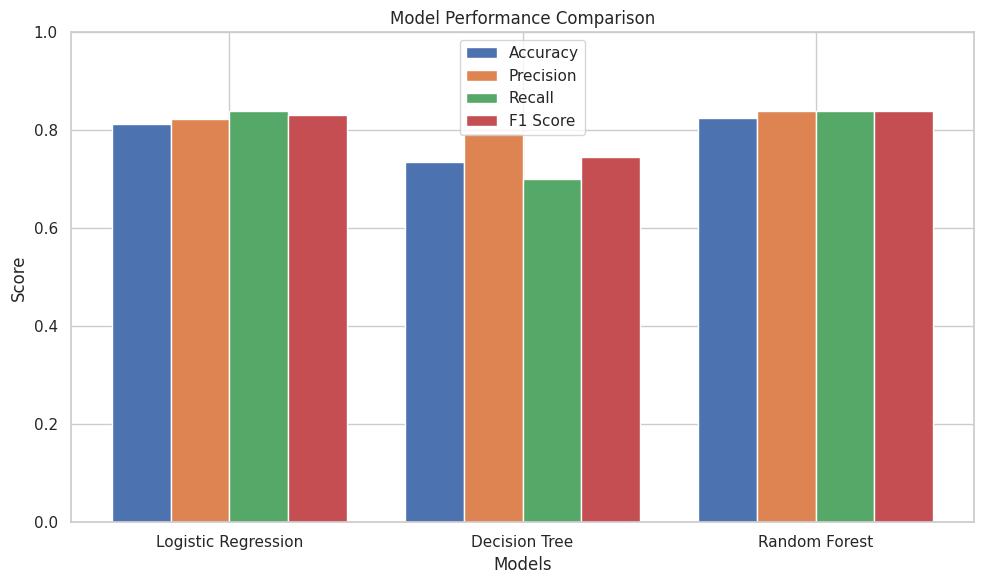

In [ ]:
# Plot scores
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2*width, f1s, width, label='F1 Score')


plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width / 2, models)
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

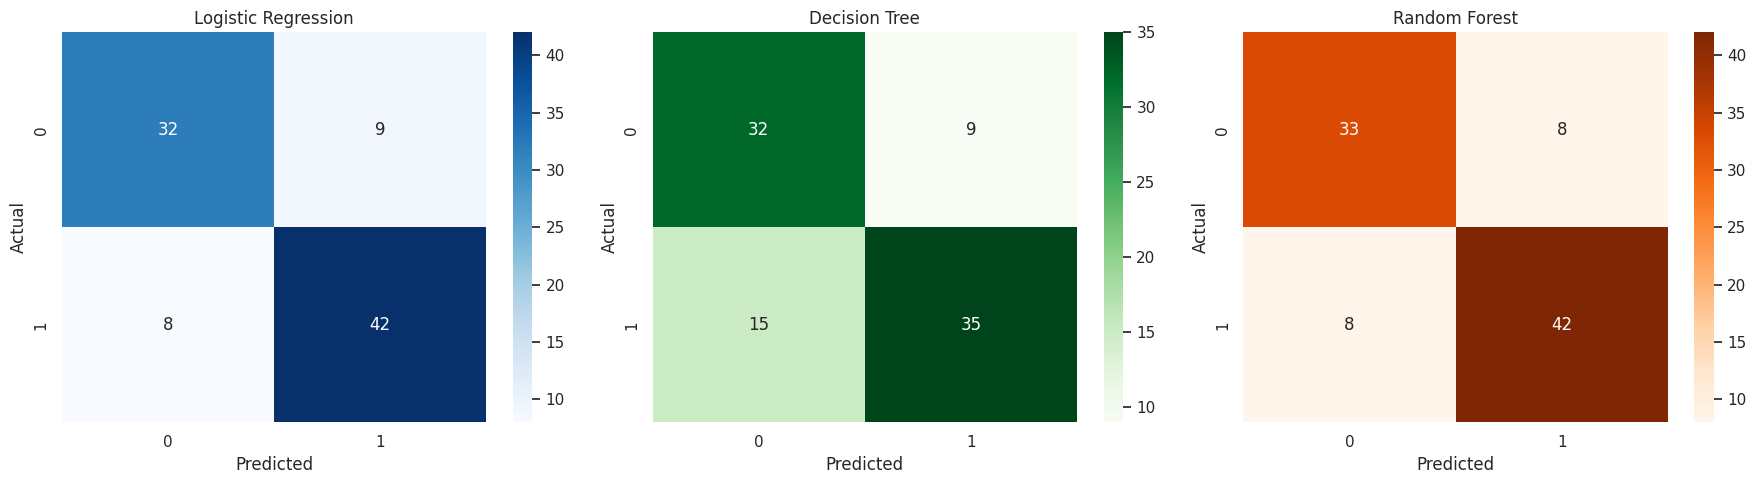

In [ ]:
# Side-by-side confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()